## Import libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# PyTorch libraries
import torch
from torchvision import transforms
from PIL import Image
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

## Define Model

In [2]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.cnn_layers = Sequential(
            # defining a 2d convolutions layer 
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Dropout(0.2),
            # defining another 2d convolutional layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            Dropout(0.2)

        )
        
        self.linear_layers = Sequential(
            Linear(4*7*7, 10)
        )
    
    # defining the forward pass
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

## Load already trained model

In [4]:
model = Net()
PATH = 'saved_model.pt'
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

## Predict

In [5]:
def predict_label(img_path):
    
    # categories
    labels = {"0":"T-shirt/top",
    "1":"Trouser",
    "2":"Pullover",
    "3":"Dress",
    "4":"Coat",
    "5":"Sandal",
    "6":"Shirt",
    "7":"Sneaker",
    "8":"Bag",
    "9":"Ankle boot"}
    
    # preprocess image to resize image to 28 X 28 pixels and convert to a 2D tensor
    p = transforms.Compose([transforms.Scale((28,28))])
    img = Image.open(img_path)
    img = p(img)
    
    pre_process = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
    
    img = pre_process(img)
    img = torch.reshape(img, (list(img.shape)[1], list(img.shape)[2]))
    
    # convert 2D tensor to 4D tensor
    img_ten = torch.reshape(img, [1,1,28,28])
    
    with torch.no_grad():
      output = model(img_ten.float())

    softmax = torch.exp(output)
    prob = list(softmax.numpy())
    prediction = np.argmax(prob, axis=1)
    print(prediction)
    print(labels[str(prediction[0])])
    plt.imshow(img)
    plt.show()
    
    return labels[str(prediction[0])]

[8]
Bag


/home/prasanth/anaconda3/lib/python3.8/site-packages/torchvision/transforms/transforms.py:256: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


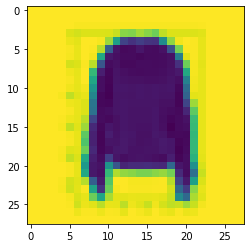

In [6]:
labe = predict_label('test.jpeg')

In [7]:
labe

'Bag'